In [3]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, build, checkpoints
import matplotlib.pyplot as plt

# Final Cifar10 models with sigmoid activation

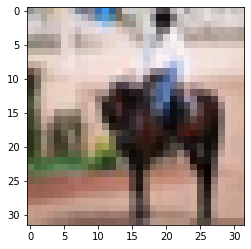

In [4]:
(x,y), (_,_) = keras.datasets.cifar10.load_data()
dataset = x[y.flatten() == 7]
plt.imshow((dataset).astype('int32')[1])
dataset = dataset.reshape((dataset.shape[0],)+ (32,32,3)) .astype('float32') /255.

In [5]:
res = 32
channel = 3
# Preprocessing data with custom function
batch_size = 64
img_shape = (res,res,channel)
epochs = 500
latent_dim = 100
n_images = 16
s = tf.random.normal([n_images, latent_dim])
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
image_dir = "../../../oDig/cifar/final/sig/"
checkpoint_dir = '../../../checkpoints/cifar_checkpoints/final/sig/'
image_freq = 100
checkpoint_freq =100
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-04-09 12:15:57.769257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 12:15:57.800185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 12:15:57.800577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 12:15:57.801810: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Ascending

In [6]:
name = 'Model_5-Asc-Sig-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen1, disc1 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen1, disc=disc1,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 4096)              413696    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      131200    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                         

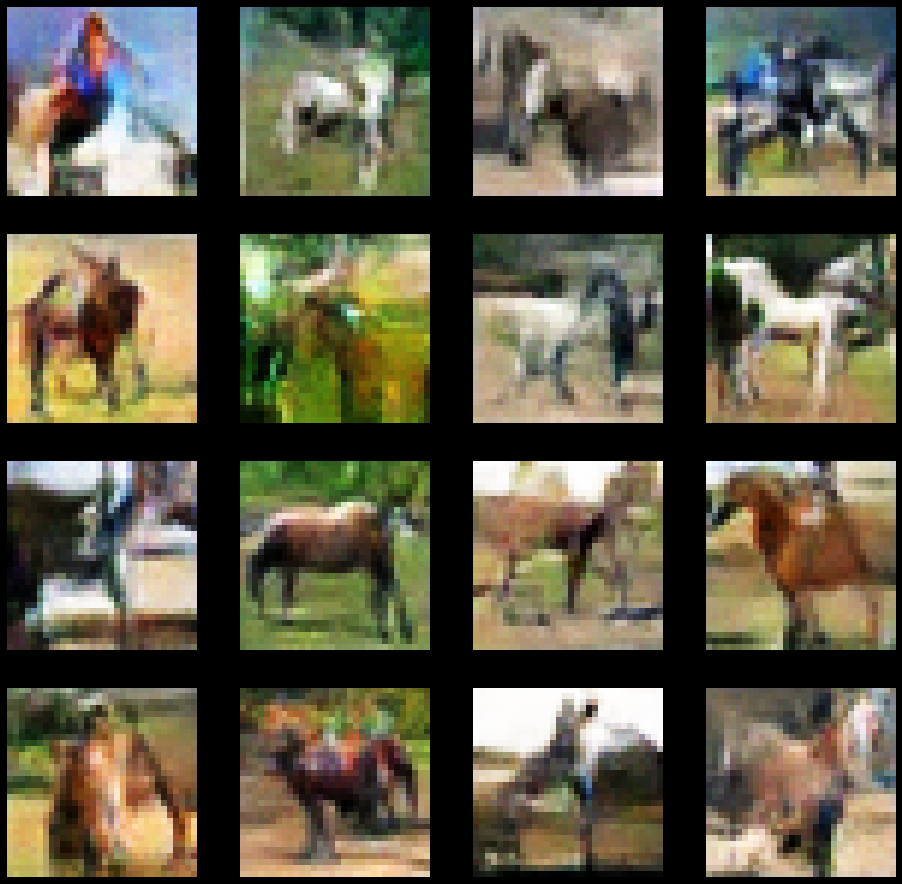

None
157/157 [==============================] - 5s 30ms/step - d_loss: 0.6268 - g_loss: 0.8124


In [7]:
g = gan.GAN(g=gen1, d=disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [8]:
name = 'Model_9-Asc-Sig-nBatch-mDrop'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen2, disc2 = model.build(model9)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen2, disc=disc2,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                         

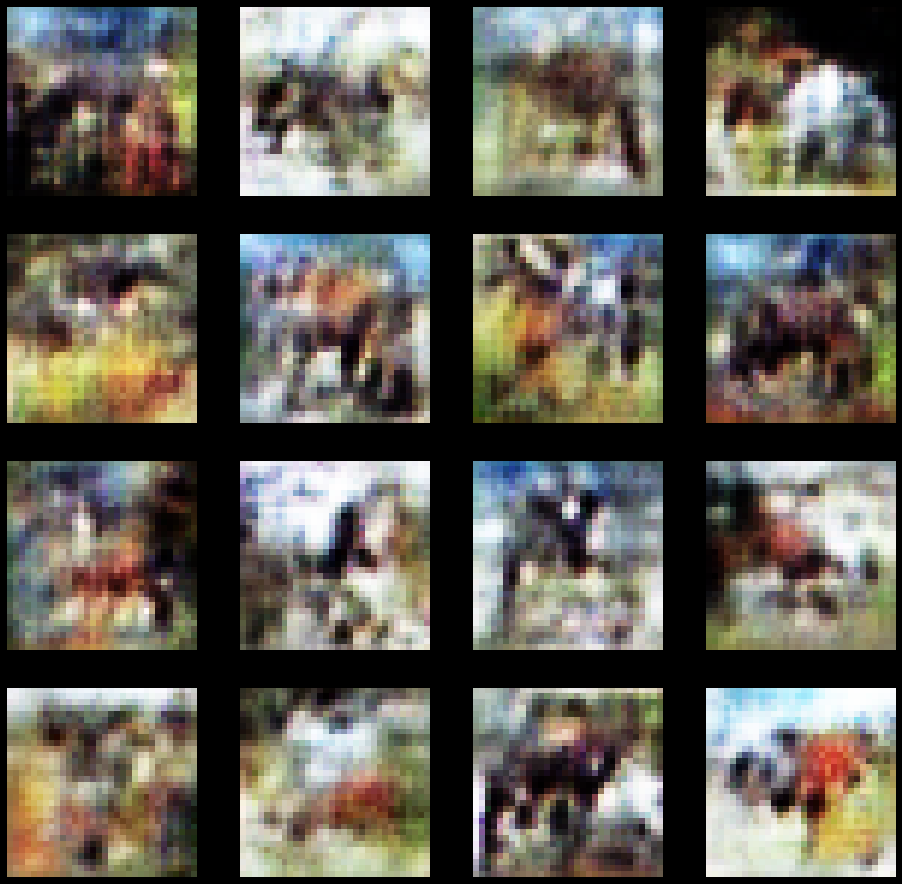

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6923 - g_loss: 0.6450


In [9]:
g = gan.GAN(g=gen2, d=disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [10]:
name = 'Model_10-Asc-Sig-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen3, disc3 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen3, disc=disc3,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

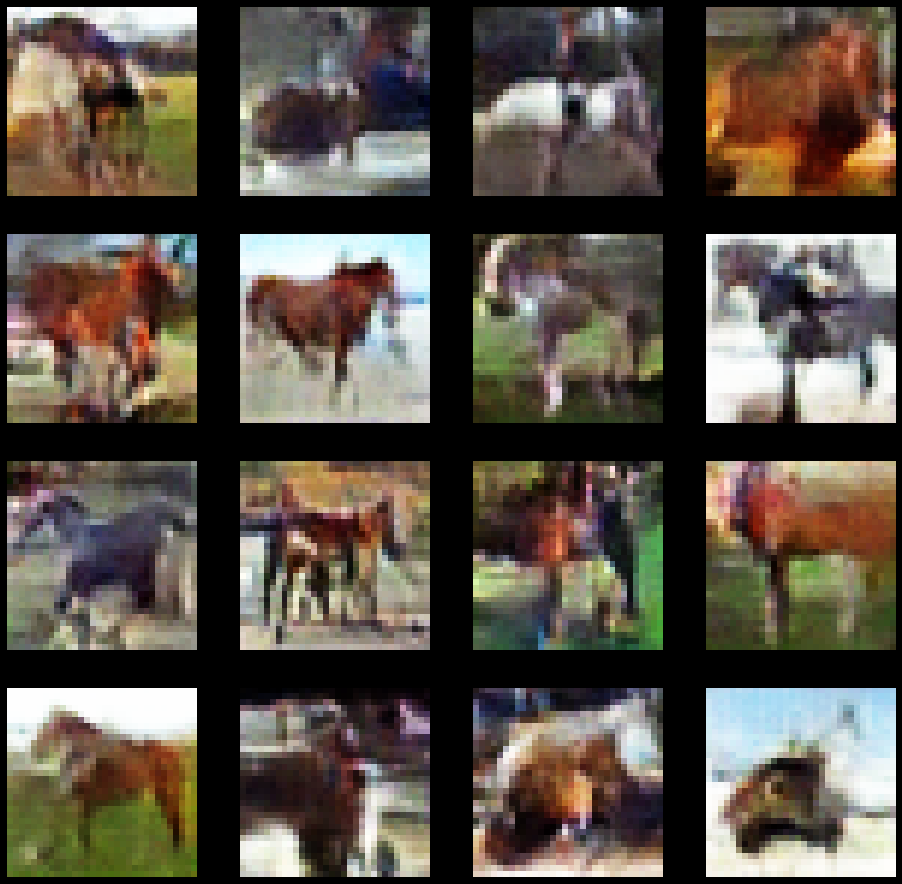

None
157/157 [==============================] - 5s 29ms/step - d_loss: 0.6132 - g_loss: 0.8371


In [11]:
g = gan.GAN(g=gen3, d=disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [12]:
name = 'Model_15-Asc-Sig-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen4, disc4 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen4, disc=disc4,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

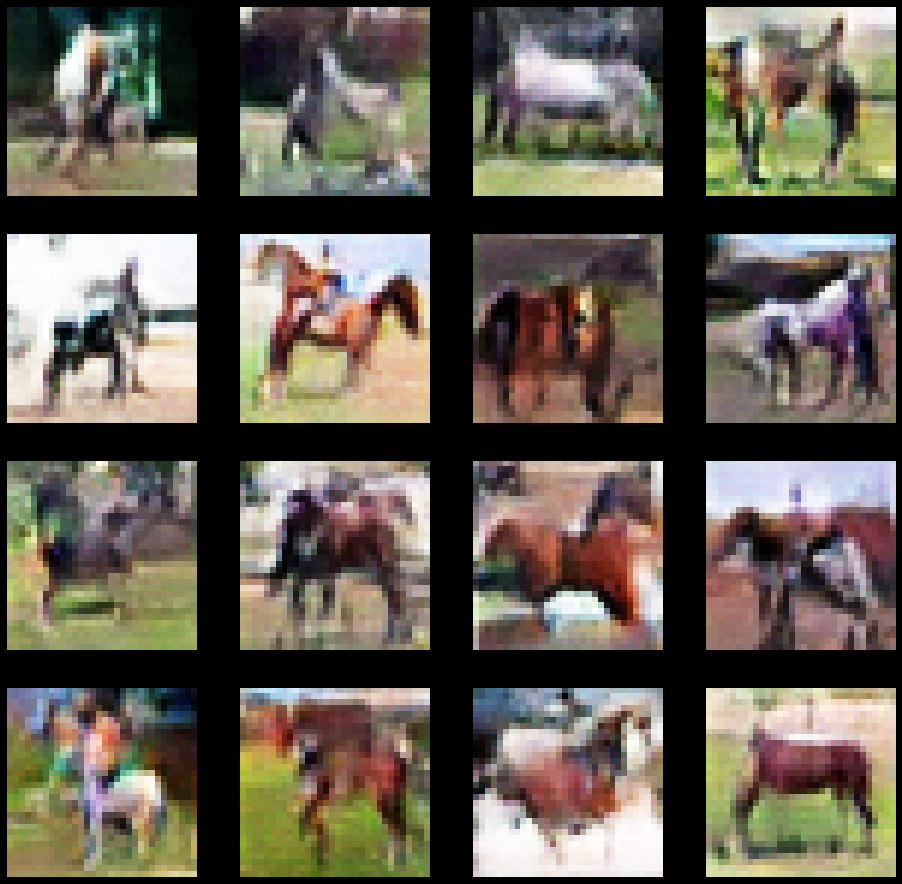

None
157/157 [==============================] - 5s 31ms/step - d_loss: 0.5897 - g_loss: 0.8841


In [13]:
g = gan.GAN(g=gen4, d=disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [14]:
name = 'Model_20-Asc-Sig-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen5, disc5 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen5, disc=disc5,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

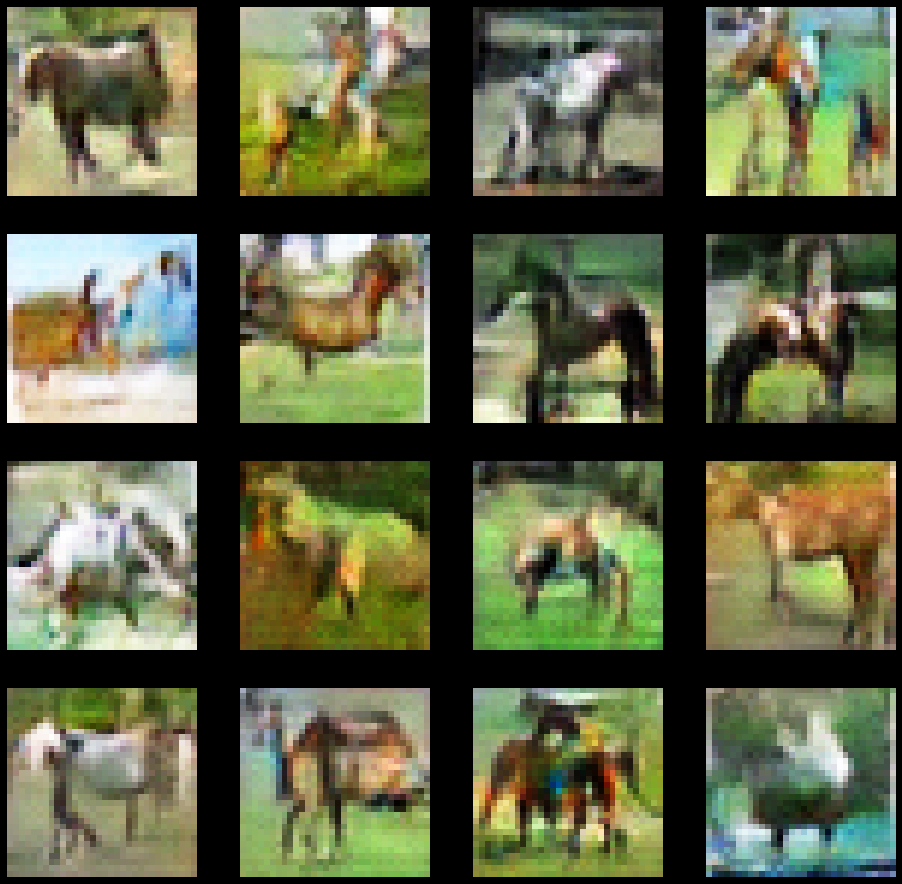

None
157/157 [==============================] - 5s 33ms/step - d_loss: 0.6026 - g_loss: 0.8801


In [15]:
g = gan.GAN(g=gen5, d=disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

# Descending

In [16]:
name = 'Model_5-Desc-Sig-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen6, disc6 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen6, disc=disc6,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

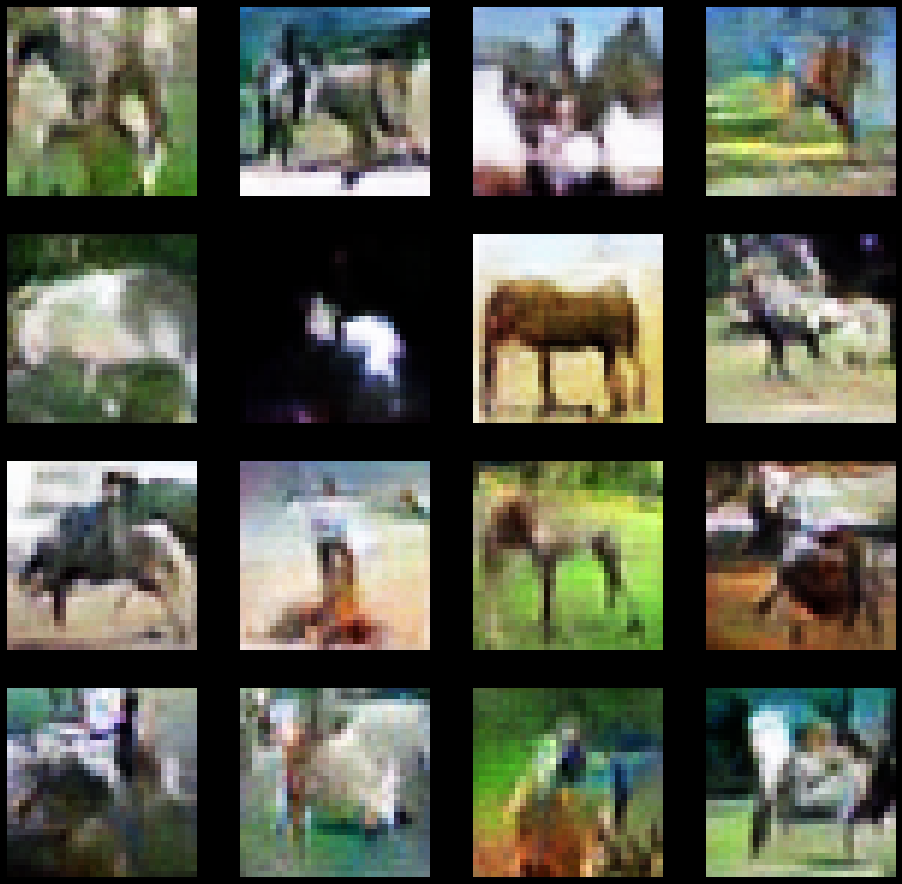

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6633 - g_loss: 0.7342


In [17]:
g = gan.GAN(g=gen6, d=disc6, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [18]:
name = 'Model_10-Desc-Sig-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen7, disc7 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen7, disc=disc7,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

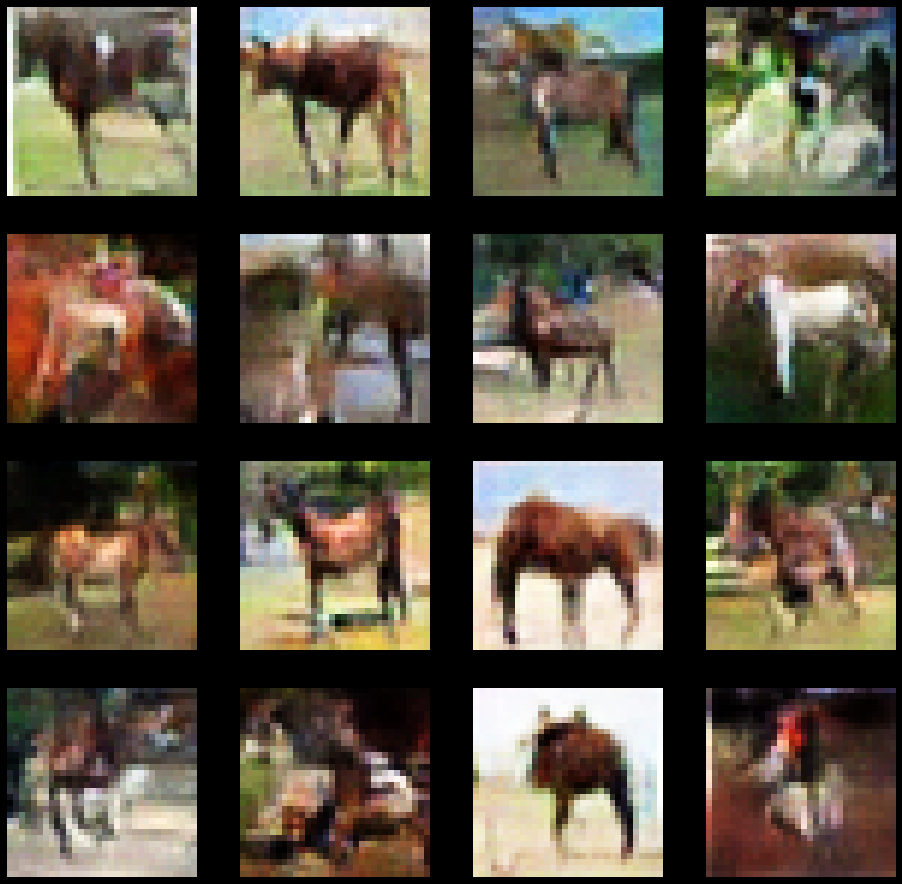

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6682 - g_loss: 0.7239


In [19]:
g = gan.GAN(g=gen7, d=disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [20]:
name = 'Model_15-Desc-Sig-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen8, disc8 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen8, disc=disc8,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

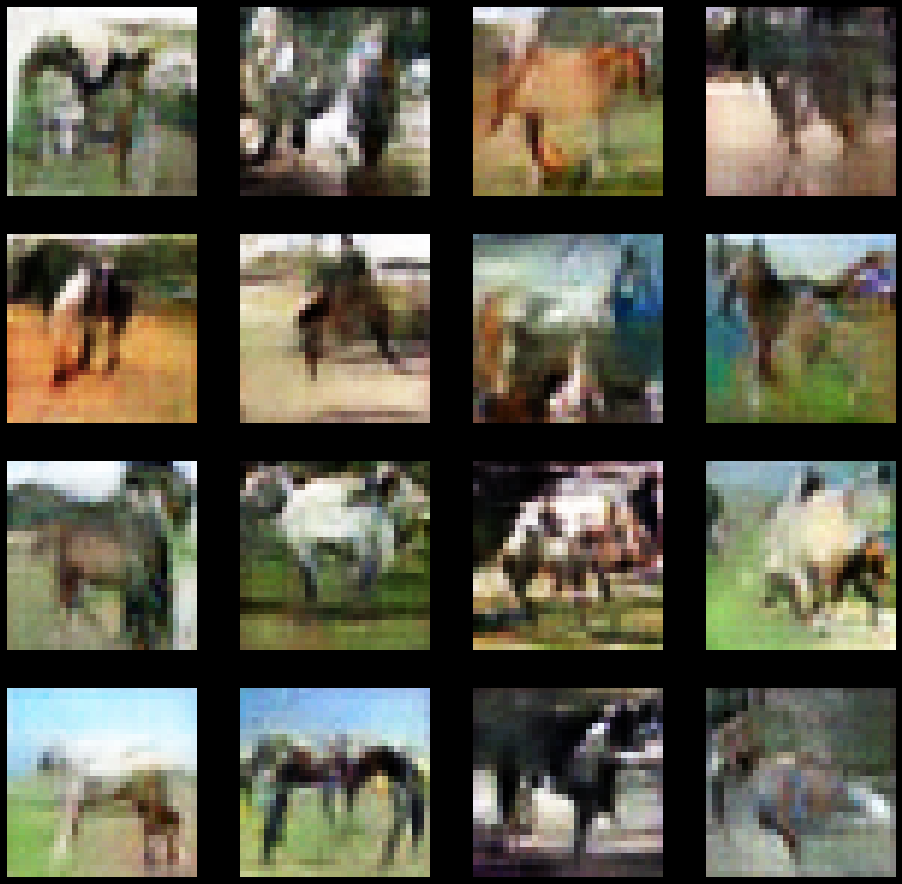

None
157/157 [==============================] - 4s 23ms/step - d_loss: 0.6581 - g_loss: 0.7352


In [21]:
g = gan.GAN(g=gen8, d=disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [22]:
name = 'Model_20-Desc-Sig-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen9, disc9 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen9, disc=disc9,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_8 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

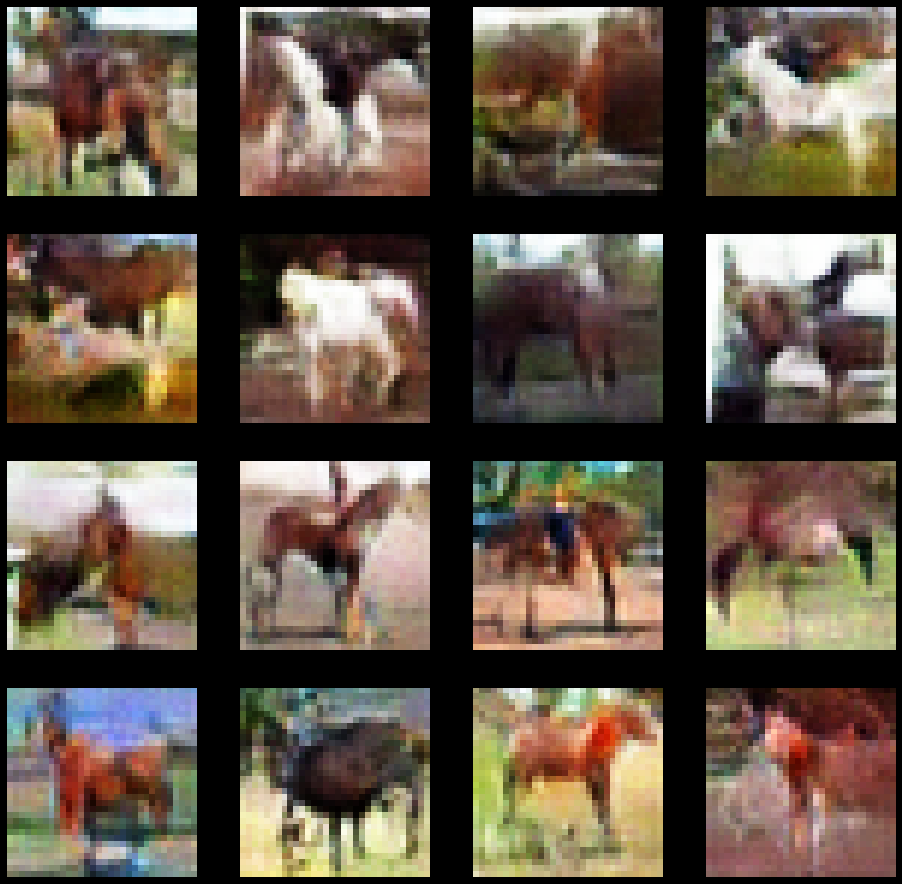

None
157/157 [==============================] - 4s 22ms/step - d_loss: 0.6597 - g_loss: 0.7396


In [23]:
g = gan.GAN(g=gen9, d=disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

# Same

In [24]:
name = 'Model_5-Same-Sig-nBatch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen10, disc10 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen10, disc=disc10,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_9 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

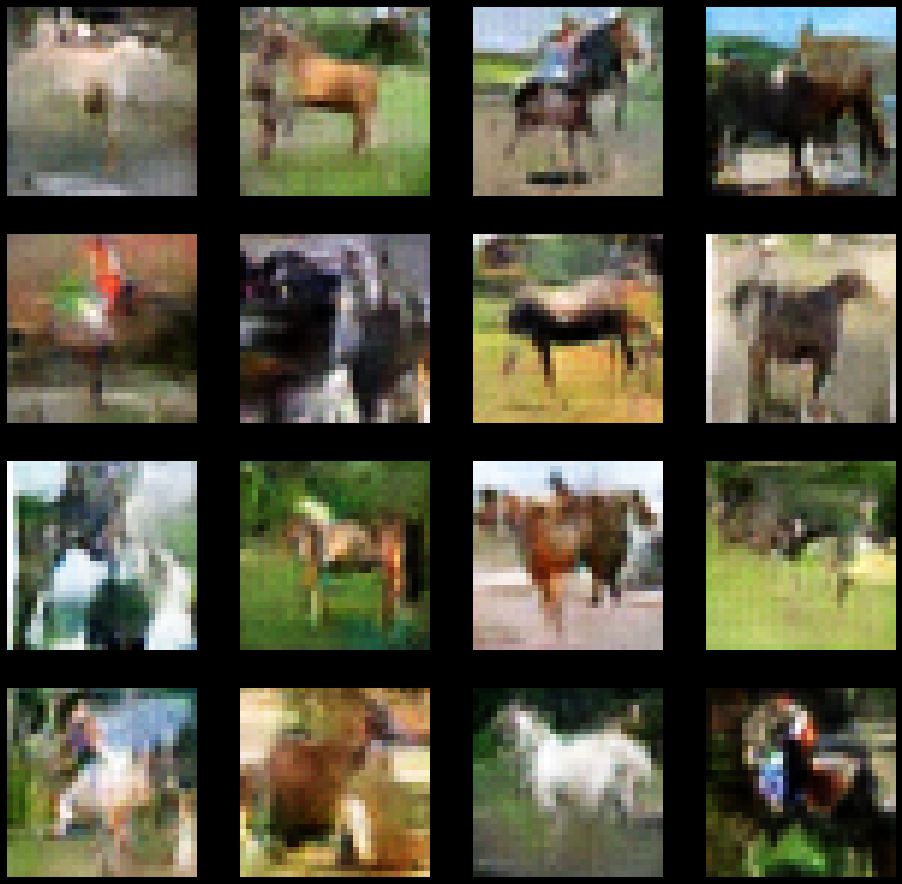

None
157/157 [==============================] - 5s 29ms/step - d_loss: 0.5681 - g_loss: 0.9499


In [25]:
g = gan.GAN(g=gen10, d=disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [26]:
name = 'Model_10-Same-Sig-nBatch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen11, disc11 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen11, disc=disc11,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_10 (Reshape)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

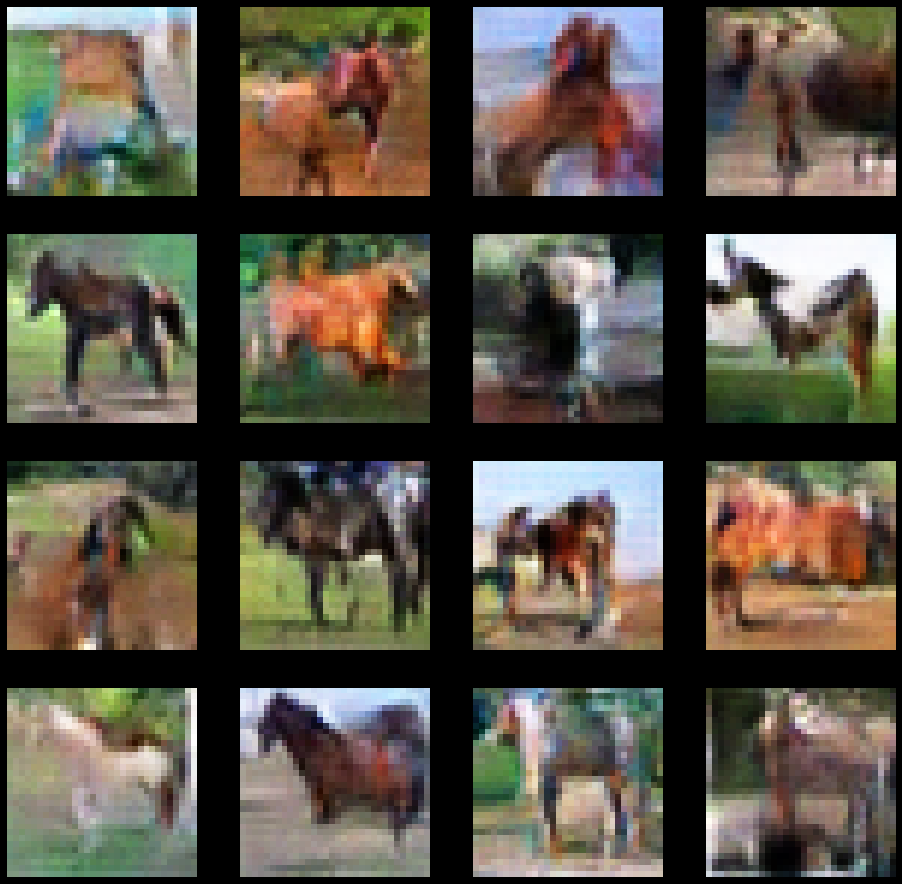

None
157/157 [==============================] - 5s 31ms/step - d_loss: 0.5765 - g_loss: 0.9458


In [27]:
g = gan.GAN(g=gen11, d=disc11, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [28]:
name = 'Model_15-Same-Sig-Batch-sDrop'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen12, disc12 = model.build(model5)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen12, disc=disc12,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_22 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_11 (Reshape)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

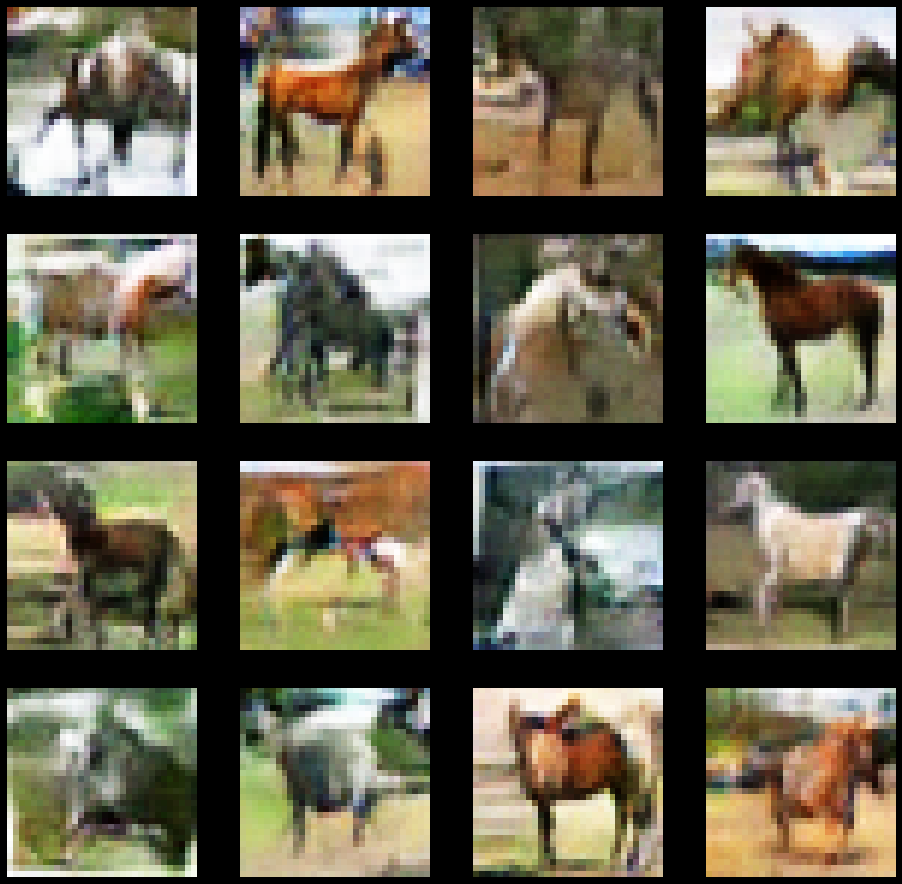

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.5495 - g_loss: 1.0241


In [29]:
g = gan.GAN(g=gen12, d=disc12, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])

In [30]:
name = 'Model_20-Same-Sig-Batch-mDrop'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen13, disc13 = model.build(model10)
check, check_prefix = checkpoints.createCheck(name,checkpoint_dir, gen=gen13, disc=disc13,
                                        gen_opt=g_optimizer, disc_opt=d_optimizer)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_24 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_12 (Reshape)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

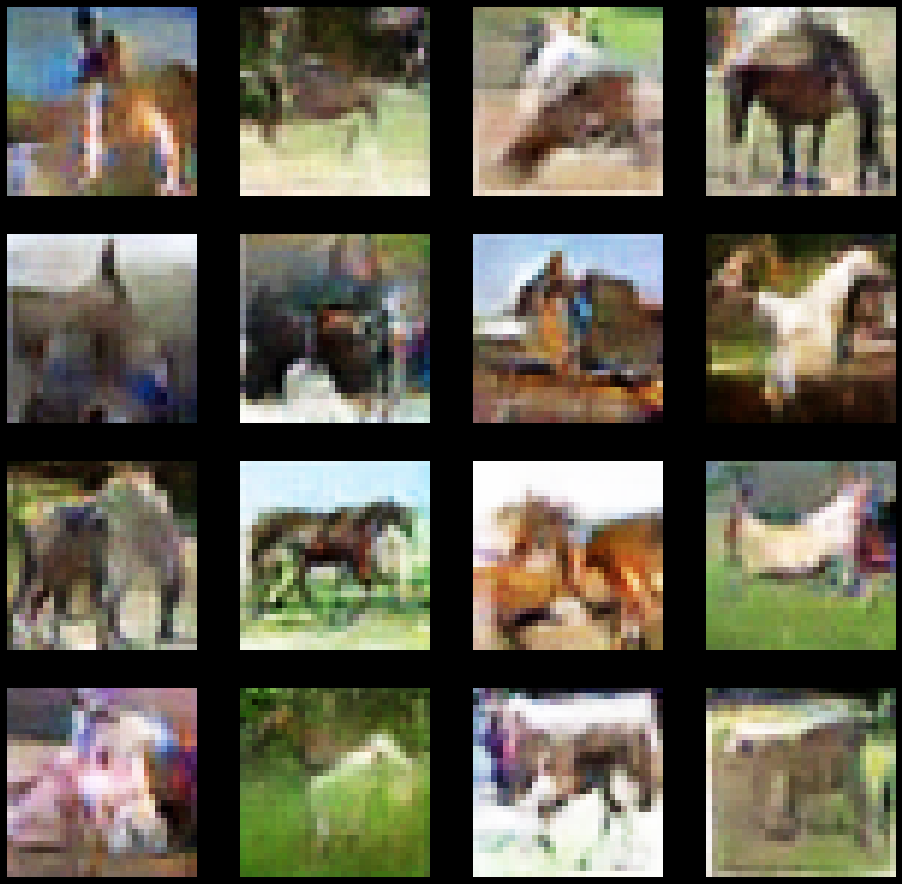

None
157/157 [==============================] - 5s 32ms/step - d_loss: 0.5409 - g_loss: 1.0299


In [31]:
g = gan.GAN(g=gen13, d=disc13, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,cFreq=checkpoint_freq,iFreq=image_freq, seed=s, loc=image_dir, name=name, checkpoint=check,prefix=check_prefix)])